# 3 Detect Faces and Eye Locations in Videos

**Objective:** Use openCV to read videos frame by frame. Use matplotlib or openCV to save the frames as images. Use openCV to compare frames from genuine and Deepfake videos. You can compute a simple difference between original and Deepfake frames and save the difference as an image. You can also compare the histograms of original and Deepfake frames.

Workflow: 

1. use test data
2. make a bounding box on a frame
3. identify landmarks in faces
4. apply logic to current problem


* `./VidTIMIT/VidTIMIT` - folder with original videos
* `./DeepfakeTIMIT`- folder with Deepfake videos


In [2]:
import numpy as np
import glob
import os
import numpy as np

import cv2
from cv2 import imread
from cv2 import CascadeClassifier

print(cv2.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

from mtcnn import MTCNN
detector = MTCNN()

4.5.2


In [3]:
# os.getcwd()

In [4]:
# download cascade classifiers here:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# find test images here:
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

In [5]:
# load the pre-trained model
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")

In [6]:
# example of face detection with opencv cascade classifier

# load the photograph
pixels = cv2.imread('test1.jpg')
# show the image
cv2.imshow('face detection', pixels)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

In [7]:
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)

[173  74 108 108]
[363 104  97  97]


In [8]:
# extract boxes
x, y, width, height = box
x2, y2 = x + width, y + height
# draw a rectangle over the pixels
cv2.rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       ...,

       [[112, 123, 145],
        [124, 135, 157],
        [133, 141, 164],
        ...,
        [ 97, 169, 241],
        [ 98, 167, 240],
        [ 96, 168, 240]],

       [[146, 158, 186],
        [151, 163, 191],
        [148, 160, 188],
        ...,
        [ 99, 170, 238],
        [ 99, 168, 238],
        [ 98, 168, 238]],

       [[143, 153, 183],
        [145, 155, 185],
        [139, 149, 179],
        ...,
        [ 99, 169, 236],
        [101, 168, 237],
        [ 99, 168, 237]]

In [9]:
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	cv2.rectangle(pixels, (x, y), (x2, y2), (0,255,0), 6)
# show the image
cv2.imshow('face detection', pixels)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

In [10]:
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
# bboxes = classifier.detectMultiScale(pixels)

# play with hyperparameters scaleFactor and minNeighbors 
bboxes = classifier.detectMultiScale(pixels, 1.01, 6)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	cv2.rectangle(pixels, (x, y), (x2, y2), (0,255,0), 4)
# show the image
cv2.imshow('face detection', pixels)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

In [11]:
# detect faces in the image
# load the photograph
pixels = imread('test1.jpg')
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [186, 71, 92, 115], 'confidence': 0.9999665021896362, 'keypoints': {'left_eye': (209, 112), 'right_eye': (252, 120), 'nose': (221, 142), 'mouth_left': (203, 152), 'mouth_right': (244, 160)}}
{'box': [371, 86, 94, 124], 'confidence': 0.958221435546875, 'keypoints': {'left_eye': (392, 131), 'right_eye': (437, 137), 'nose': (406, 164), 'mouth_left': (389, 176), 'mouth_right': (434, 181)}}


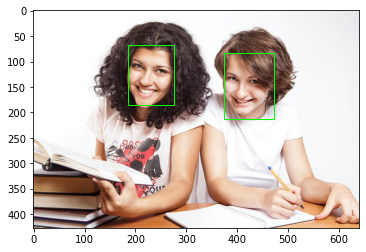

In [12]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='lime')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

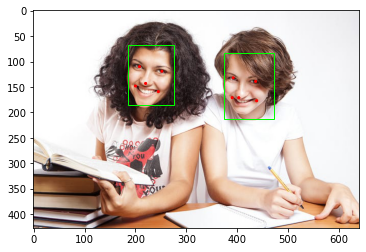

In [13]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='lime')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

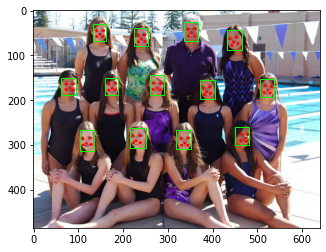

In [14]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='lime')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

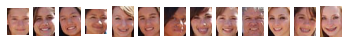

In [15]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

In [16]:
# moving to video frames

# The provided solution face detection and feature extraction 

#This code is provided to you, so you can focus on the goals of this project.

### Step 1: Set the path to example videos and to datasets

In [17]:
import numpy as np
import glob
import os
import cv2
# some settings to make it smoothly runnable in Jupyter
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
# the paths to the folders where all videos are
real_folder = './VidTIMIT/VidTIMIT/'
fake_folder = './DeepfakeTIMIT/higher_quality/'  # we focus on high quality videos of DeepfakeTIMIT dataset

In [19]:
# video of interest
video_id = 66

In [20]:
# iterate through real and fake videos
# creates lists of real and fake videos
real_videos_list = []
fake_videos_list = []

for f in glob.glob(os.path.join(real_folder, "*/*.avi")):
    real_videos_list.append(f)
for f in glob.glob(os.path.join(fake_folder, "*/*.avi")):
    fake_videos_list.append(f)

In [21]:
# Get the list of all files and directories
# in real_folder working directory
dir_list = os.listdir(real_folder)
len(dir_list)

43

In [22]:
len(real_videos_list)

430

In [23]:
len(fake_videos_list)

320

In [24]:
# let's take one real video and one fake
real_video = real_videos_list[video_id]
fake_video = fake_videos_list[video_id]

In [25]:
real_frame_name = os.path.splitext(real_video)[0] + '_1.jpg'
fake_frame_name = os.path.splitext(fake_video)[0] + '_1.jpg'

real_frame_name
fake_frame_name

'./DeepfakeTIMIT/higher_quality\\fedw0\\sx274-video-faks0_1.jpg'

In [26]:
real_video

'./VidTIMIT/VidTIMIT\\fdac1\\sx214.avi'

In [27]:
fake_video

'./DeepfakeTIMIT/higher_quality\\fedw0\\sx274-video-faks0.avi'

### Step 2 Run provided face detection and extraction code

In [28]:
def eyes_angle(left_eye, right_eye):
    # find the distances between X and Y coordinates of both eyes
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    # compute the angle using trigonometry
    angle = np.degrees(np.arctan2(dY, dX))
    return angle

In [29]:
def scaling_factor(left_eye, right_eye, desired_left_eye, desired_right_eye):
    # find the distances between X and Y coordinates of both eyes
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    # find the actual distance between eyes (the hypotenuse)
    dist = np.sqrt((dX ** 2) + (dY ** 2))
    # find the distance between X and Y coordinates in the desired face (which we will have after scaling)
    desired_dY = desired_right_eye[1] - desired_left_eye[1]
    desired_dX = desired_right_eye[0] - desired_left_eye[0]
    # find the  distance between desired eye coordinates (the hypotenuse)
    desired_dist = np.sqrt((desired_dX ** 2) + (desired_dY ** 2))
    
    # compute the ratio between distances, which is the scale factor
    scaling_factor = desired_dist / dist
    return scaling_factor   

In [30]:
def crop_and_align(image, left_eye, right_eye, desired_image_width, 
                   desired_left_eye_percentage):
    # find angle of the line between the eyes
    angle = eyes_angle(left_eye, right_eye)

    # assuming desired_left_eye_percentage tells where the eyes should be relative to the image size
    # compute its actual place in the resulted image
    desired_left_eye = (desired_left_eye_percentage[0]*desired_image_width, 
                        desired_left_eye_percentage[1]*desired_image_width)
    # similar compute the mirror coordinates for desired_right_eye
    desired_right_eye = ((1.0-desired_left_eye_percentage[0])*desired_image_width, 
                        desired_left_eye_percentage[1]*desired_image_width)

    # find scaling factor based on where we want our eyes to be in the resulted image
    scale = scaling_factor(left_eye, right_eye, desired_left_eye, desired_right_eye)
    
    # find the center point between two eyes, around which we will rotate the image
    eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

    # compute the rotation matrix using OpenCV, rotate and scale around the eyes_center
    M = cv2.getRotationMatrix2D(eyes_center, angle, scale)

    # move the current center of the eyes to the desired coordinates, which are
    # mid point horizontally and the desired level vertically
    tX = desired_image_width * 0.5
    tY = desired_left_eye[1]
    M[0, 2] += (tX - eyes_center[0])
    M[1, 2] += (tY - eyes_center[1])

    # by specifying height and width of the final image
    # as our desired_image_width, we insruct warpAffine to cut off the extra pixels
    w = desired_image_width
    h = desired_image_width

    # using OpenCV warpAffine() apply the M transformation, which will also crop the image
    aligned = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)
    return aligned

In [31]:
from mtcnn import MTCNN
detector = MTCNN()

In [32]:
# detect one face and its eyes coordinates in the given image
def detect_face(image, desired_size=224, desired_left_eye_percentage=(0.35, 0.35)):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detection_result = detector.detect_faces(image_rgb)
    left_eye = detection_result[0]['keypoints']['left_eye']
    right_eye = detection_result[0]['keypoints']['right_eye']
    face = crop_and_align(image, left_eye, right_eye, desired_size, desired_left_eye_percentage)
    if face is not None:
        return face
    return None

In [33]:
# loop through frames in the video and detect faces
def detect_and_save_faces(video_path, limit_faces=-1, save_faces=True):
    detector = MTCNN()
    faces = list()
    # add '_face' at the end to differentiate face images
    face_name = os.path.splitext(video_path)[0] + '_face'
    
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for frame_no in range(num_frames):
        # if the given limit is not -1, loop only until the limit
        if limit_faces != -1 and frame_no >= limit_faces:
            break
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        # detect faces
        face = detect_face(frame, desired_size=256, desired_left_eye_percentage=(0.35, 0.35))
        if face is not None:
            faces.append(face)
            if save_faces:
                cv2.imwrite(face_name + '_' + str(frame_no) + '.png', face)
    return faces

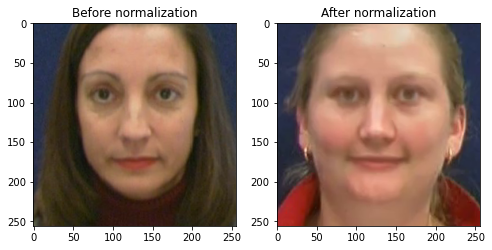

In [34]:
# running provided code on one real and one fake video
real_faces = detect_and_save_faces(real_video, limit_faces=5)
fake_faces = detect_and_save_faces(fake_video, limit_faces=5)

# convert the list of faces to the numpy array
# define a function that will read and display given images
def display_images_side_by_side(im1, im2):
    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

    # show the images side by side
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(im1)
    plt.title('Before normalization')
    plt.subplot(1, 2, 2)
    plt.title('After normalization')
    plt.imshow(im2)
    plt.show()

# plot real and fake faces side by side
display_images_side_by_side(real_faces[0], fake_faces[0])

### Step 3 Run provided code for computing features

 Run code and compute features for two faces, as an example

In [35]:
import skimage.metrics
num_hist_bins = 32

# Note that the number of bins we use for the histogram is a parameter of the system
# more bins - more features
def compute_hist(image, num_bins=32):
    hist, bins = np.histogram(image.ravel(), num_bins, [0,255], density=True)
    return hist


def compute_blurred_image(image, kernel_size=3, sigma=0.5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def mse(x, y):
    return skimage.metrics.normalized_root_mse(x, y)

def psnr(x, y):
    return skimage.metrics.peak_signal_noise_ratio(x, y, data_range=255)

def ssim(x, y):
    return skimage.metrics.structural_similarity(x, y, multichannel=True, 
                                                 gaussian_weights=True, sigma=1.5, 
                                                 use_sample_covariance=False, data_range=255)

def compute_features(image):
    image_blurred = compute_blurred_image(image)
    im_ssim = ssim(image, image_blurred)
    im_mse = mse(image, image_blurred)
    im_psnr = psnr(image, image_blurred)
    im_hist = compute_hist(image, num_bins=num_hist_bins)
    features = np.concatenate([[im_ssim], [im_mse], [im_psnr], im_hist])
    return features

# as an example, compute features just for one real and one fake faces
real_feature = compute_features(real_faces[0])
fake_feature = compute_features(fake_faces[0])
print("Real feature vector:\n {} \nof length {}".format(real_feature, len(real_feature)))
print("Deepfake feature vector:\n {} \nof length {}".format(fake_feature, len(fake_feature)))

# notice the last values in both case are zeros, 
# that's because these face have not bright pixels with values near 255,
# so, the last bin of the histogram becomes empty 

Real feature vector:
 [9.97352346e-01 5.87794529e-03 5.31932736e+01 3.22329453e-04
 3.54690053e-03 7.84122243e-03 8.15014808e-03 8.96458844e-03
 1.20034212e-02 1.43656812e-02 8.74948938e-03 7.32230392e-03
 6.56849980e-03 4.11560458e-03 3.33690768e-03 3.54115605e-03
 3.67008783e-03 3.80029616e-03 4.10283905e-03 3.69753370e-03
 3.35924734e-03 3.02032271e-03 3.26350592e-03 2.06546160e-03
 1.76802492e-03 1.28612643e-03 1.16166258e-03 1.15910948e-03
 1.25676573e-03 1.55994690e-03 1.28740298e-03 1.99780433e-04
 3.82965686e-06 0.00000000e+00 0.00000000e+00] 
of length 35
Deepfake feature vector:
 [9.98417351e-01 4.80354802e-03 5.24079619e+01 1.67228350e-04
 8.51460376e-04 1.23442606e-03 1.55994690e-03 3.42179841e-03
 7.47995813e-03 7.57250817e-03 4.63388480e-03 5.03663705e-03
 7.42378983e-03 6.24680862e-03 6.32404003e-03 5.78214359e-03
 5.82809947e-03 5.97426471e-03 5.92256434e-03 6.03681577e-03
 5.06535948e-03 5.24982128e-03 5.61683007e-03 4.30325776e-03
 4.62048100e-03 3.04266238e-03 2.5199

In [35]:
# end

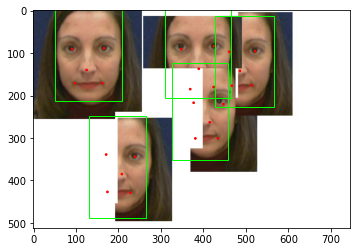

In [36]:
# try on custom image copy pasted together and saved as 'a_0.jpg'

from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='lime')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = 'a_0.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)